# 4_3_2 Multiclass Perceptron_Iris Dataset

The multiclass perceptron should be regarded as direct extension of the binary Perceptron. The binary case can be extended as follows:

Algorithm:

```
w(k, n) = 0
iterate over epochs:
    iterate over observations (i):
        y_hat = argmax(x_i w.T)
        if y_hat != y_i
            w[y] = w[y] + x_i
            w[y_hat] = w[y_hat] - x_i
```
So, if prediction is wrong, we need to lower the score of wrong answer and raise score of right answer.

In [13]:
#1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [14]:
#2. Loading Iris dataset
iris = datasets.load_iris()
target = iris.target
data = iris.data

# print(target)

x = data
y = target

y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [16]:
#2. Add bias, Split dataset and code the multiclass perceptron

from sklearn.model_selection import train_test_split

#Add bias to x
m, n = x.shape
X = np.concatenate([np.ones((m,1)), x], axis = 1)
m, n = X.shape

y = np.array(y)

#Split datset test_size = 0.3, and random_state = 0

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, random_state=0)
print(yTest.shape, yTrain.shape)

# Initialize the W matrix in zeros (one row per class), and n columns

k = 3 #Number of classes
m,n = xTrain.shape 

w = np.zeros((k, n))

#Print the w shape, it must be (3,5)
print(w.shape)

# Define number of iterations or epochs
epochs = 20

#Multiclass Perceptron
for j in range(epochs):
    
    #Initialize variables
    correct = 0 
    yt = [] 
    
    #Multiclass perceptron algorithm
    for i in range(m):
        z = np.dot(xTrain[i, :], w.T)
        y_hat = np.argmax(z)
        yt.append(y_hat)
        if y_hat != yTrain[i]:
            w[yTrain[i], :] = w[yTrain[i], :] + xTrain[i, :]
            w[y_hat, :] = w[y_hat, :] - xTrain[i, :]
        else:
            correct += 1

print('correct', correct, 'from', m)
print('W',w)

(45, 1) (105, 1)
(3, 5)
correct 103 from 105
W [[  8.   21.   39.9 -52.  -25.7]
 [ 17.   20.3  -4.5 -15.2 -24.2]
 [-25.  -41.3 -35.4  67.2  49.9]]


In [21]:
#Performance measurement for Training
print(xTest.shape)
zTesting = np.dot(xTrain, w.T)
y_hat_training = np.argmax(zTesting, axis=1)

y_hat_training = y_hat_training.reshape(-1,1)

accTrain = np.sum(y_hat_training == yTrain) / len(yTrain)

print('Acc Training: ', accTrain)

(45, 5)
Acc Training:  0.9809523809523809


In [18]:
#Performance measurement for Testing
print(xTest.shape)
zTesting = np.dot(xTest, w.T)
y_hat_testing = np.argmax(zTesting, axis=1)

y_hat_testing = y_hat_testing.reshape(-1,1)

accTest = np.sum(y_hat_testing == yTest) / len(yTest)


print('Acc Testing: ', accTest)

(45, 5)
Acc Testing:  0.9333333333333333


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTrain, y_hat_training)
print(cm)

[[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]


In [23]:
cm1 = confusion_matrix(yTest, y_hat_testing)
print(cm1)

[[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]


In [24]:
def plot_confusion_matrix(values, classes):
    import itertools
    m, n = values.shape

    accuracy = np.trace(values) / float(np.sum(values))
    misclass = 1 - accuracy

    plt.figure(figsize=(10, 10))
    plt.imshow(values, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()

    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    thresh = values.max() / 2
    for i, j in itertools.product(range(m), range(n)):
        plt.text(j, i, "{:,}".format(values[i, j]),
                 horizontalalignment="center",
                 color="white" if values[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

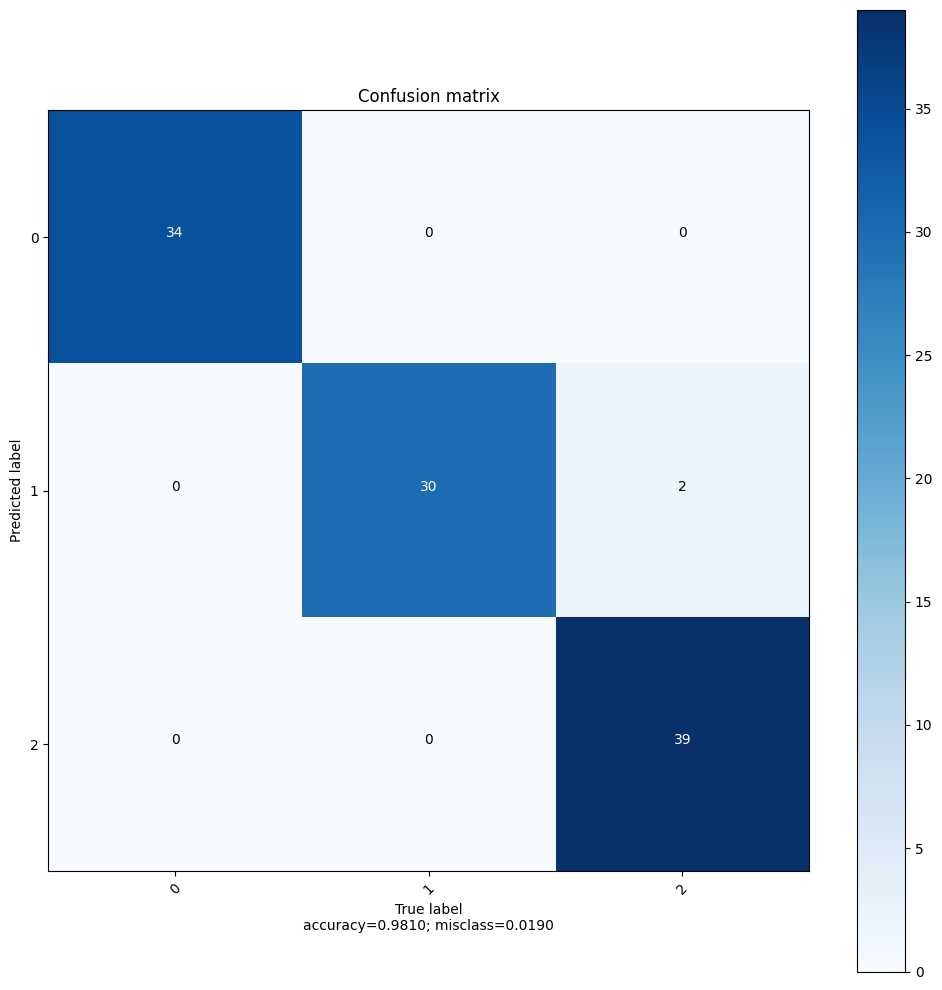

In [25]:
#Training Confusion Matrix
plot_confusion_matrix(values = cm, classes = ['0', '1', '2'])

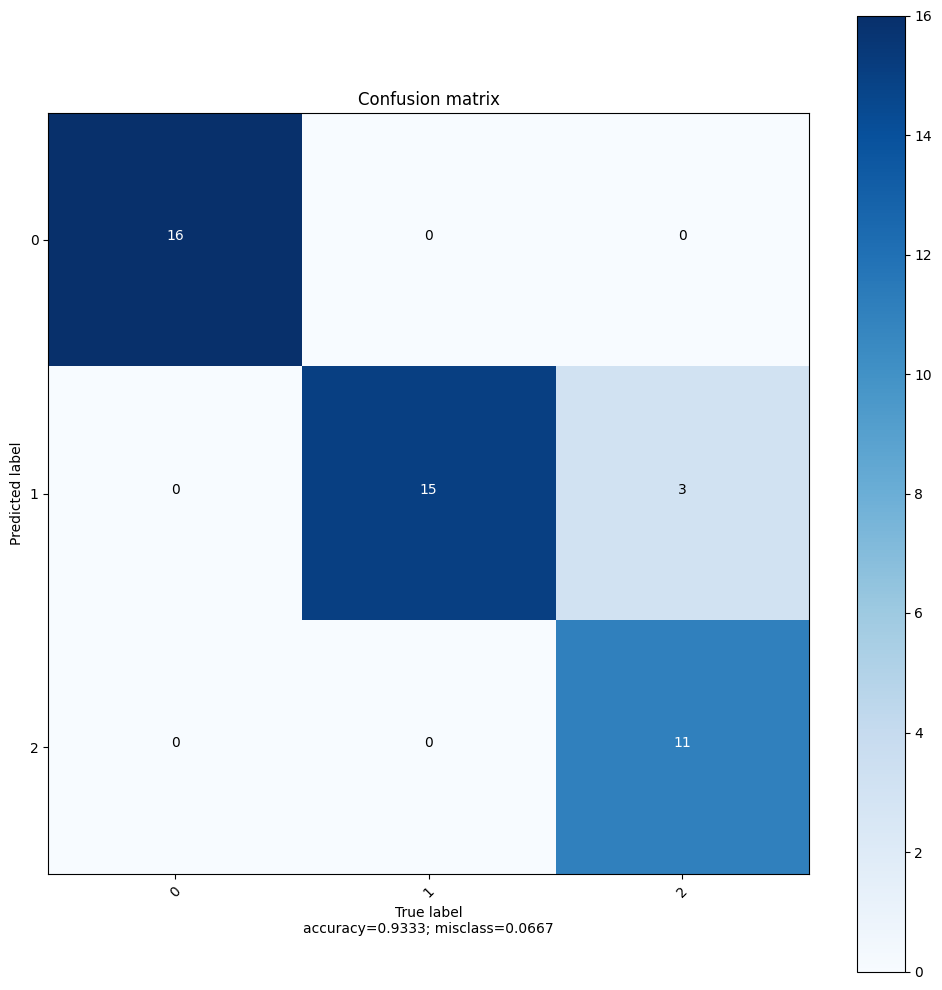

In [26]:
#Testing Confusion Matrix
plot_confusion_matrix(values = cm1, classes = ['0', '1', '2'])